# Transmissie lijnen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
import schemdraw
import schemdraw.elements as elm

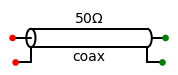

In [8]:
d = schemdraw.Drawing()

d.add(elm.Dot,color='r')
coax=d.add(elm.coax(d='right',length=5, label='$50\Omega$', botlabel='coax'))
d.add(elm.Dot,color='g')
d.add(elm.Line(xy=coax.shieldend,l=0.5,d='down'))
d.add(elm.Line(l=0.5,d='right'))
d.add(elm.Dot,color='g')
d.add(elm.Line(xy=coax.shieldstart,l=0.5,d='down') )
d.add(elm.Line(l=0.5,d='left'))
d.add(elm.Dot,color='r')
d.draw()

```{figure} ./images/mpl.svg
---
name: t_model
---
schematische voorstelling van een transmissielijn met karakteristieke impedantie van 50 Ohm
```

## Transmissie lijn model

$$ Z_o=\sqrt{\frac{j \omega L+R}{j \omega C+g}}$$

waarbij L de inductantie per eenheid lengte is, C de capaciteit er eenheid lengte is, R de weerstannd van de geleider en g de lekgeleidbaarheid van het dielectricum.

In het beste geval is de weerstand van de geleider nul (R=0) en de lek ook nul (g=0). $Z_o$ wordt dan 

$$ Z_o=\sqrt{\frac{L}{C}}$$

## coax kabel

[![coax](./images/coax.png)](https://www.eeweb.com/tools/coax/)

Voor een typische [coax-kabel](https://en.wikipedia.org/wiki/Coaxial_cable) hebben we C =93 pF/m, L =273 nH/m,  R = 53 mOhm/m,  g =0 S/m

Het verloop van de karakteristieke impedantie ziet er voor deze coax kabel uit als aangegeven in {numref}`t_Z-f`

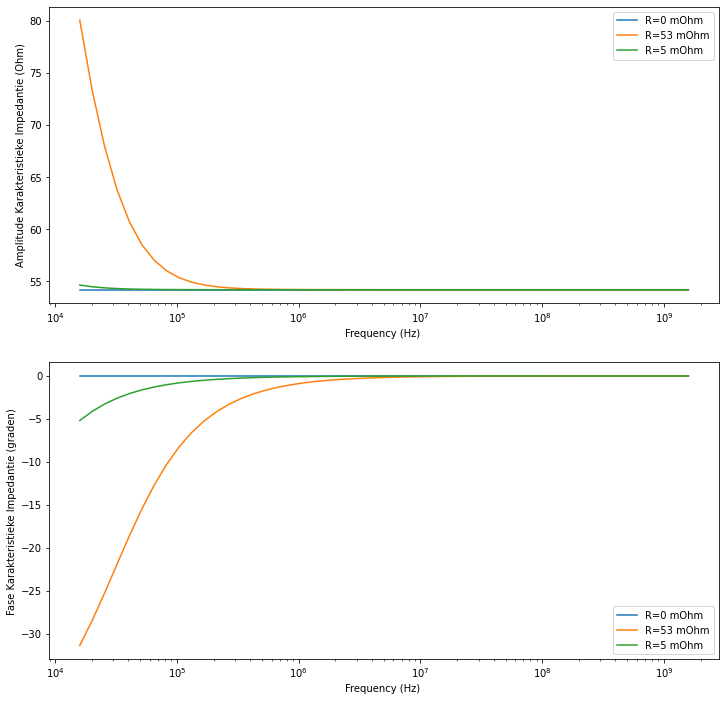

In [37]:
fig,ax = plt.subplots(2,1,figsize=(12,12))
w=np.logspace(5,10,50)
z=np.sqrt((1.0j*w*273e-9+0.0)/(1.0j*w*93e-12))
z2=np.sqrt((1.0j*w*273e-9+0.053)/(1.0j*w*93e-12))
z3=np.sqrt((1.0j*w*273e-9+0.005)/(1.0j*w*93e-12))
ax[0].plot(w/2/np.pi,abs(z), label="R=0 mOhm")
ax[0].plot(w/2/np.pi,abs(z2), label="R=53 mOhm")
ax[0].plot(w/2/np.pi,abs(z3), label="R=5 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z,deg=True), label="R=0 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z2,deg=True), label="R=53 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z3,deg=True), label="R=5 mOhm")
ax[0].set_xscale('log')
ax[0].set_ylabel('Amplitude Karakteristieke Impedantie (Ohm)',size = 10)
ax[0].set_xlabel('Frequency (Hz) ',size = 10)
ax[1].set_xscale('log')
ax[1].set_ylabel('Fase Karakteristieke Impedantie (graden)',size = 10)
ax[1].set_xlabel('Frequency (Hz) ',size = 10);
ax[0].legend()
ax[1].legend();

```{figure} ./images/mpl.svg
---
name: t_Z-f
---
Verloop van de karakteristieke impedantie van een RG-58 coax als functie van de frequentie.
```

Uit {numref}`t_Z-f` merken we dat bij lage frequenties deze karakteristieke impedantie in belangrijke mate verschilt van 50 Ohm. De negatieve fase geeft aan dat bij lage frequenties de lijn zich capacitief gedraagt.